In [102]:
import pandas as pd
import  numpy  as  np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from pandas_ml import ConfusionMatrix
from scipy.fftpack import fft
from geopandas import GeoDataFrame
import geopandas
from shapely.geometry import Point
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [103]:
raw_data_file_name= "Data_to_Clustered/dilum_sir_route.json"
raw_data = pd.read_json(raw_data_file_name)
raw_data.head(5)

,acceY,anomaly,lat,lon,time
0,10.014616,A,6.761253,79.947881,1538098877180
1,10.115843,A,6.758759,79.948375,1538098907538
2,10.028455,A,6.758759,79.948375,1538098908240
3,10.260644,A,6.758699,79.948589,1538098910039
4,10.023666,A,6.758502,79.949441,1538098918479


In [104]:
raw_data.shape

(984, 5)

In [105]:
#features = ['lat','lon',]
#coordinates = raw_data[features]
#coordinates.head()

In [106]:
#coordinates.shape

In [107]:
#coordinates['coordinates'] = list(zip(coordinates.lon, coordinates.lat))

In [108]:
#coordinates.head()

In [109]:
#coordinates['coordinates'] = coordinates['coordinates'].apply(Point)

In [110]:
#coordinates.head()

In [111]:
#gdf = GeoDataFrame(coordinates, geometry='coordinates')
#gdf.plot()

In [112]:
#print(gdf.head())

In [113]:
#world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
#ax = world[world.continent == 'Asia'].plot(
    #color='white', edgecolor='black')

# We can now plot our GeoDataFrame.
#gdf.plot(ax=ax, color='red')

#plt.show()

In [114]:
#gdf.plot()

In [115]:
#kms_per_radian = 6371.0088
#epsilon = 0.01 / kms_per_radian
#print(epsilon)

In [116]:
kms_per_radian = 6371.0088
epsilon = 0.005 / kms_per_radian
coords = raw_data.as_matrix(columns=['lat', 'lon'])
#print(coords)

In [117]:
db = DBSCAN(eps = epsilon, min_samples=5, algorithm='ball_tree',metric='haversine').fit(np.radians(coords))

In [118]:
cluster_labels = db.labels_
n_clusters = len(set(cluster_labels))

In [119]:
cluster_labels 

array([-1, -1, -1, -1, -1, -1,  0,  0, -1, -1, -1, -1, -1, -1,  1,  1,  1,
       -1,  2,  2,  3,  3,  3,  3, -1, -1,  4,  4,  4,  4,  5,  5,  5, -1,
        6,  6, -1, -1, -1, -1, -1, -1, -1, -1,  7,  7,  8,  8, -1,  9, -1,
       10, 10, 11, 11, 11, -1, -1, -1, -1, 12, 12, -1, 13, 13, -1, 14, 14,
       14, 14, 15, 15, 16, 16, 16, 17, 17, 17, 17, -1, -1, 18, 18, -1, -1,
       -1, 19, 19, -1, -1, -1, 20, 20, -1, 21, 21, 21, 22, 22, 22, 23, 23,
       23, 23, 23, -1, -1, -1, -1, 24, 24, 24, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, 25, 25, 25, -1, -1, -1, -1, -1, -1, 26, 26, 26,
       -1, -1, -1, 27, 27, 27, -1, 28, 28, 28, 29, 29, 29, 29, 29, -1, -1,
       -1, -1, -1, -1, -1, -1, 30, 30, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 31, 32, 32, 32, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, 33, 33, -1, -1, -1, -1, -1, 34, 34, 34,
       -1, -1, -1, -1, -1

In [120]:
db

DBSCAN(algorithm='ball_tree', eps=7.848050688613082e-07, leaf_size=30,
    metric='haversine', metric_params=None, min_samples=5, n_jobs=1,
    p=None)

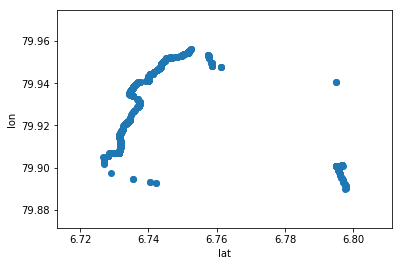

In [121]:
x = raw_data['lat']
y = raw_data['lon']

plt.scatter(x,y)
plt.xlabel("lat")
plt.ylabel("lon")
plt.show()

In [122]:
db.core_sample_indices_

array([  6,   7,  15,  16,  18,  19,  20,  21,  22,  23,  26,  27,  28,
        29,  30,  31,  32,  34,  35,  44,  45,  46,  47,  49,  51,  52,
        53,  54,  55,  60,  61,  63,  64,  66,  67,  68,  69,  70,  71,
        72,  73,  74,  75,  76,  77,  78,  81,  82,  86,  87,  91,  92,
        94,  95,  96,  97,  98, 100, 101, 102, 103, 104, 109, 110, 111,
       141, 142, 143, 150, 151, 152, 156, 157, 158, 160, 161, 162, 163,
       164, 165, 167, 176, 177, 197, 198, 199, 211, 212, 218, 219, 220,
       226, 227, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248,
       249, 253, 254, 255, 256, 261, 262, 263, 264, 265, 266, 267, 271,
       272, 276, 277, 278, 285, 286, 287, 288, 289, 290, 291, 292, 293,
       298, 299, 300, 301, 302, 303, 304, 326, 327, 329, 330, 331, 332,
       333, 334, 335, 336, 337, 338, 339, 346, 347, 355, 356, 358, 359,
       360, 361, 362, 363, 366, 367, 368, 369, 370, 371, 372, 374, 375,
       384, 385, 386, 387, 389, 391, 392, 393, 394, 395, 400, 40

In [123]:
result = raw_data
result['cluster'] = db.labels_
result = result.iloc[db.core_sample_indices_]
result.head()

,acceY,anomaly,lat,lon,time,cluster
6,10.262656,A,6.757848,79.951910,1538098935758,0
7,10.156688,A,6.757848,79.951910,1538098936060,0
15,10.071455,A,6.751704,79.954650,1538099033699,1
16,10.029700,A,6.751704,79.954650,1538099033998,1
18,10.049045,A,6.751611,79.954563,1538099035718,2


In [124]:
result.shape

(417, 6)

In [125]:
result['cluster'].describe()

count    417.000000
mean      26.676259
std       13.890826
min        0.000000
25%       16.000000
50%       29.000000
75%       38.000000
max       49.000000
Name: cluster, dtype: float64

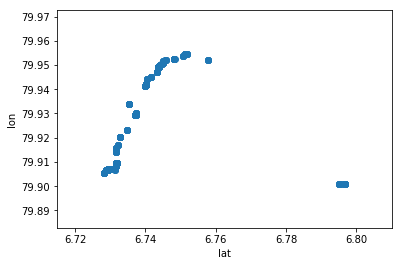

In [126]:
x = result['lat']
y = result['lon']
c = result['cluster']

#plt.scatter(x,y,c)
plt.scatter(x,y,label=c)
plt.xlabel("lat")
plt.ylabel("lon")
plt.show()

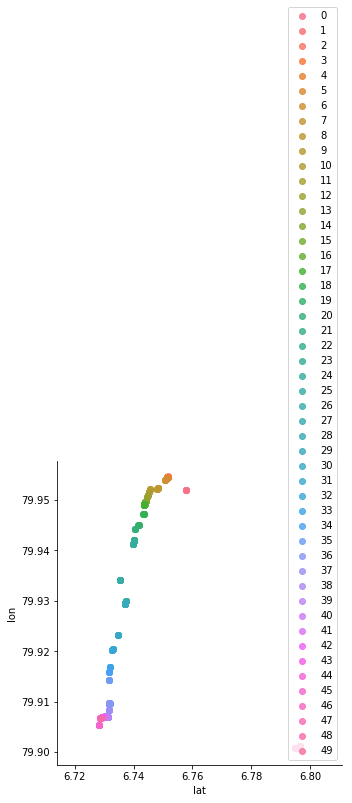

In [127]:
import seaborn as sns
#df = sns.load_dataset('iris')
 
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="lat", y="lon", data=result, fit_reg=False, hue='cluster', legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')


In [128]:
result.to_json("Clustered_Data/dilum_sir_route.json", orient='records')